## 1. Data loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
renewables = pd.read_csv("API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_13732.csv", skiprows=4)
co2_tot = pd.read_csv("API_EN.GHG.CO2.MT.CE.AR5_DS2_en_csv_v2_15981.csv", skiprows=4)

### Renewable Energy Consumption (% of total final energy consumption)

In [3]:
renewables.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.700000,7.000000,6.800000,8.600000,8.300000,9.100000,8.8,8.8,NaN,NaN
1,Africa Eastern and Southern,AFE,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,62.128338,62.457688,61.891132,62.242631,63.387090,66.123449,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.700000,20.200000,19.500000,18.300000,18.900000,18.200000,20.0,20.0,NaN,NaN
3,Africa Western and Central,AFW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,76.689160,76.283383,76.413081,75.960030,75.328928,76.102819,NaN,NaN,NaN,NaN
4,Angola,AGO,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,47.100000,48.100000,52.500000,52.500000,51.000000,60.100000,52.9,NaN,NaN,NaN


### Total CO2 Emissions (excluding land use)

In [4]:
co2_tot.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4620,0.4849,0.4666,0.4659,0.5579,0.4526,0.5006,0.5027,0.5300,NaN
1,Africa Eastern and Southern,AFE,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,621.8665,628.5365,637.9068,645.8367,654.5401,578.0520,606.3945,588.4335,579.8655,NaN
2,Afghanistan,AFG,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,8.3465,7.5276,8.0661,7.9320,7.2491,7.0541,7.9308,8.2599,8.7073,NaN
3,Africa Western and Central,AFW,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,208.8912,217.4430,218.2637,230.4901,240.4359,235.9365,249.1554,251.4104,245.6408,NaN
4,Angola,AGO,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0975,31.2858,27.9421,26.2589,27.5732,20.7109,25.2628,27.3530,28.2299,NaN


## 2. Data cleaning

In [5]:
# Filter the datasets to keep only the regions of interest
regions_of_interest = [
    "European Union",
    "North America",
    "Middle East & North Africa",
    "Latin America & Caribbean",
    "Sub-Saharan Africa",
    "East Asia & Pacific"
]

renewables_regions = renewables[renewables["Country Name"].isin(regions_of_interest)].reset_index(drop=True)
co2_tot_regions = co2_tot[co2_tot["Country Name"].isin(regions_of_interest)].reset_index(drop=True)

In [6]:
# Remove unwanted columns
columns_to_drop = ["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 68"]
renewables_regions_cleaned = renewables_regions.drop(columns=[col for col in columns_to_drop if col in renewables_regions.columns])
co2_tot_regions_cleaned = co2_tot_regions.drop(columns=[col for col in columns_to_drop if col in co2_tot_regions.columns])

In [7]:
renewables_regions_cleaned.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.191459,12.950322,13.322587,13.609556,13.829096,14.259828,14.735708,NaN,NaN,NaN
1,European Union,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.450236,17.601386,17.543029,17.694855,18.730412,19.346284,21.121106,NaN,NaN,NaN
2,Latin America & Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.712953,28.223945,28.908223,29.401998,30.252797,30.659014,33.932942,NaN,NaN,NaN
3,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.559840,1.527430,1.594509,1.587154,1.663919,1.823345,1.995650,NaN,NaN,NaN
4,North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.642764,10.455523,10.813381,11.351935,11.463074,11.783752,12.599051,NaN,NaN,NaN


In [8]:
# Identify years columns that have no missing values in both datasets
valid_years = [
    year for year in renewables_regions_cleaned.columns[1:]
    if renewables_regions_cleaned[year].notna().all() and co2_tot_regions_cleaned[year].notna().all()
]

# Keep only those valid years (plus the "Country Name" column)
renewables_final = renewables_regions_cleaned[["Country Name"] + valid_years]
co2_tot_final = co2_tot_regions_cleaned[["Country Name"] + valid_years]

In [9]:
renewables_final.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,East Asia & Pacific,26.432990,25.969228,25.542476,24.797200,24.047952,23.090547,23.275395,23.002214,23.148009,...,12.764757,12.822586,12.804998,13.191459,12.950322,13.322587,13.609556,13.829096,14.259828,14.735708
1,European Union,6.908163,7.195621,7.476108,7.906890,8.015172,8.033801,8.094293,8.488385,8.613048,...,14.647629,16.063888,16.810825,17.450236,17.601386,17.543029,17.694855,18.730412,19.346284,21.121106
2,Latin America & Caribbean,32.575254,31.981278,31.681821,31.081391,30.720430,30.282753,29.382858,28.645189,28.628501,...,28.472863,27.890345,27.756749,27.712953,28.223945,28.908223,29.401998,30.252797,30.659014,33.932942
3,Middle East & North Africa,2.916499,2.820573,2.735801,2.725109,2.524311,2.484367,2.493364,2.458329,2.416365,...,1.840844,1.623128,1.649690,1.559840,1.527430,1.594509,1.587154,1.663919,1.823345,1.995650
4,North America,6.176549,6.464218,6.673937,6.233599,6.082728,6.704678,6.691243,6.433196,6.439382,...,9.789689,10.168709,10.510083,10.642764,10.455523,10.813381,11.351935,11.463074,11.783752,12.599051


In [10]:
co2_tot_final.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,East Asia & Pacific,4770.9769,4982.0333,5148.4339,5431.4296,5706.3472,6138.5309,6205.2586,6370.4261,6338.5527,...,13743.1542,14131.4308,14640.4234,14777.7674,14663.3222,14747.4895,15074.9806,15701.6692,16047.7668,16029.3684
1,European Union,3809.7009,3757.6814,3613.9383,3548.0765,3537.3744,3588.8797,3689.8982,3618.8452,3610.8575,...,3317.8348,3251.3879,3168.3446,3025.8963,3086.2151,3094.7766,3118.7076,3049.5110,2908.1569,2641.1878
2,Latin America & Caribbean,965.4108,994.5488,1010.8308,1044.9282,1108.2313,1125.7139,1201.5375,1266.2699,1318.7799,...,1744.1806,1827.3299,1861.5138,1868.7137,1858.5189,1822.9859,1809.5060,1761.8800,1756.7543,1567.4379
3,Middle East & North Africa,914.6900,957.3479,1018.8240,1075.0234,1159.5562,1193.5953,1230.0767,1286.2556,1298.8055,...,2318.9371,2450.6020,2499.6350,2583.8306,2620.6192,2654.0610,2707.3918,2682.4563,2744.9600,2666.6037
4,North America,5424.5383,5373.9568,5464.6684,5582.5812,5682.1237,5747.7804,5916.7408,6205.5673,6259.1460,...,5883.9595,5655.4632,5800.4615,5824.8263,5710.5804,5605.3867,5553.0943,5732.0850,5574.5590,5013.0334


In [11]:
# Melt into long format
renewables_long = renewables_final.melt(id_vars="Country Name", var_name="Year", value_name="Renewables (%)")
co2_tot_long = co2_tot_final.melt(id_vars="Country Name", var_name="Year", value_name="CO2 total")

In [12]:
# Merge the datasets
merged_df = pd.merge(renewables_long, co2_tot_long, on=["Country Name", "Year"])

In [13]:
merged_df["Year"] = merged_df["Year"].astype(int)

In [14]:
merged_df.head(10)

,Country Name,Year,Renewables (%),CO2 total
0,East Asia & Pacific,1990,26.432990,4770.9769
1,European Union,1990,6.908163,3809.7009
2,Latin America & Caribbean,1990,32.575254,965.4108
3,Middle East & North Africa,1990,2.916499,914.6900
4,North America,1990,6.176549,5424.5383
5,Sub-Saharan Africa,1990,70.777575,481.2761
6,East Asia & Pacific,1991,25.969228,4982.0333
7,European Union,1991,7.195621,3757.6814
8,Latin America & Caribbean,1991,31.981278,994.5488
9,Middle East & North Africa,1991,2.820573,957.3479


## 3. Renewable energy vs CO2 emissions analysis

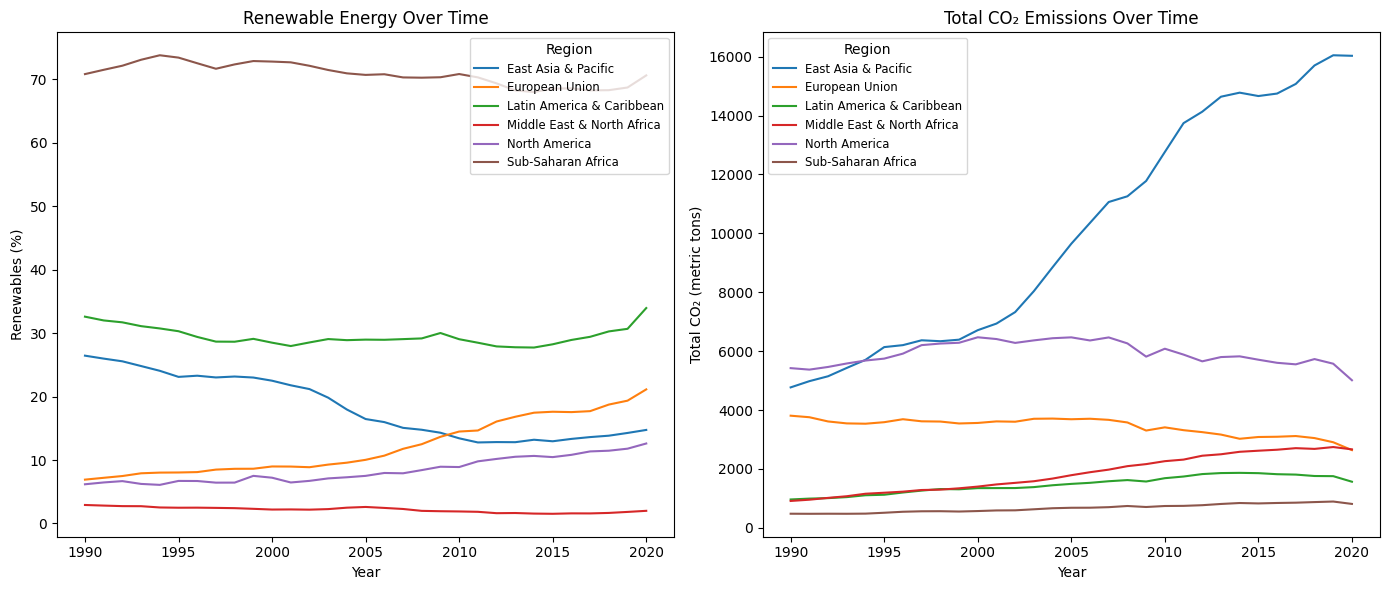

In [15]:
# Set up the figure
plt.figure(figsize=(14, 6))

# Plot 1: Renewable Energy (%)
plt.subplot(1, 2, 1)
sns.lineplot(data=merged_df, x="Year", y="Renewables (%)", hue="Country Name")
plt.title("Renewable Energy Over Time")
plt.xlabel("Year")
plt.ylabel("Renewables (%)")
plt.legend(title="Region", fontsize='small', title_fontsize='medium')

# Plot 2: Total CO2 Emissions
plt.subplot(1, 2, 2)
sns.lineplot(data=merged_df, x="Year", y="CO2 total", hue="Country Name")
plt.title("Total CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total CO₂ (metric tons)")
plt.legend(title="Region", fontsize='small', title_fontsize='medium')

plt.tight_layout()
plt.show()

In [16]:
# Filter base year values (1990)
base_year = 1990
base_values = merged_df[merged_df["Year"] == base_year][["Country Name", "Renewables (%)", "CO2 total"]]
base_values = base_values.set_index("Country Name")

# Create columns for change from base year
def compute_change_from_base(row, column_name):
    base = base_values.loc[row["Country Name"], column_name]
    return ((row[column_name] - base) / base) * 100 if pd.notnull(base) else None

merged_df["Renewables Change from 1990 (%)"] = merged_df.apply(lambda row: compute_change_from_base(row, "Renewables (%)"), axis=1)
merged_df["Total CO2 Change from 1990 (%)"] = merged_df.apply(lambda row: compute_change_from_base(row, "CO2 total"), axis=1)

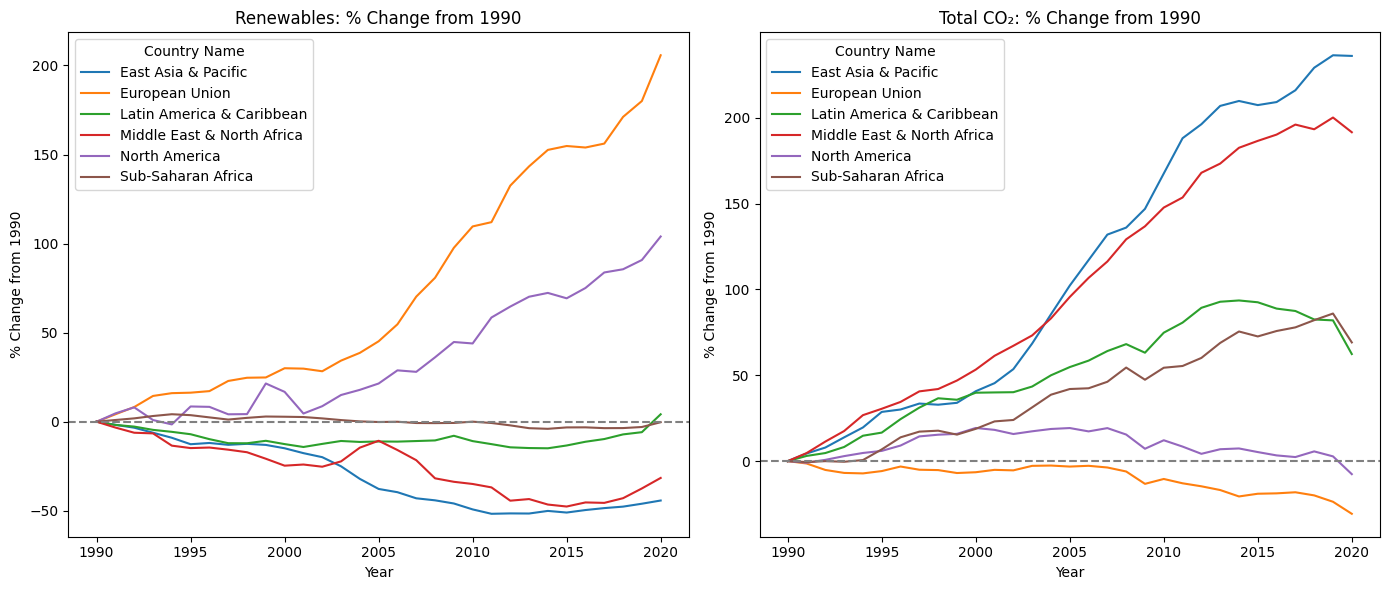

In [17]:
# Plot the trends
plt.figure(figsize=(14, 6))

# Plot 1: Renewables % change from 1990
plt.subplot(1, 2, 1)
sns.lineplot(data=merged_df, x="Year", y="Renewables Change from 1990 (%)", hue="Country Name")
plt.title("Renewables: % Change from 1990")
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("% Change from 1990")
plt.xlabel("Year")

# Plot 2: total CO2 % change from 1990
plt.subplot(1, 2, 2)
sns.lineplot(data=merged_df, x="Year", y="Total CO2 Change from 1990 (%)", hue="Country Name")
plt.title("Total CO₂: % Change from 1990")
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("% Change from 1990")
plt.xlabel("Year")

plt.tight_layout()
plt.show()

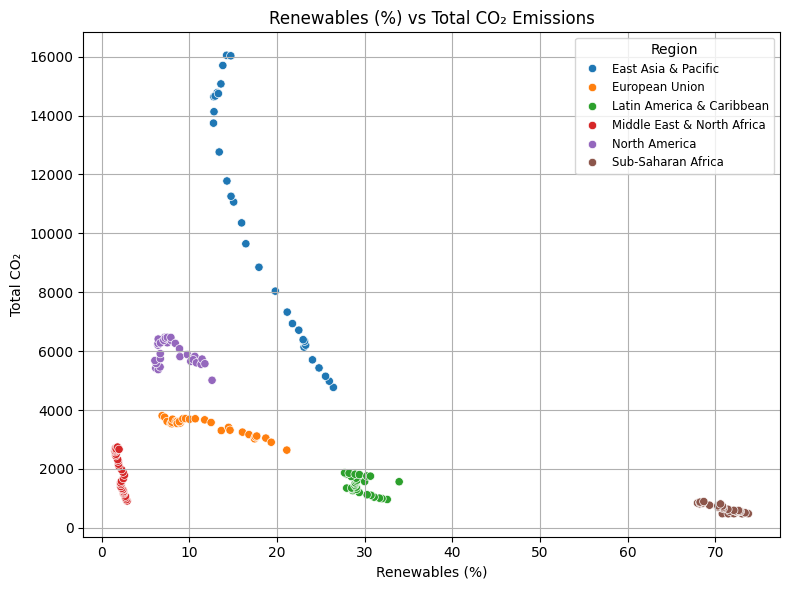

In [18]:
# scatter plot: Renewables (%) vs Total CO2
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=merged_df,
    x="Renewables (%)",
    y="CO2 total",
    hue="Country Name"
)

plt.title("Renewables (%) vs Total CO₂ Emissions")
plt.xlabel("Renewables (%)")
plt.ylabel("Total CO₂")
plt.legend(title="Region", fontsize='small', title_fontsize='medium')
plt.grid(True)
plt.tight_layout()

## 4. Correlation analysis

In [19]:
# Overall correlation between Renewables and Total CO2
overall_corr_total = merged_df[["Renewables (%)", "CO2 total"]].corr().iloc[0, 1]

# Correlation per region
region_corrs_total = (
    merged_df.groupby("Country Name")[["Renewables (%)", "CO2 total"]]
    .corr()
    .iloc[0::2, 1]
    .reset_index()[["Country Name", "CO2 total"]]
    .rename(columns={"Country Name": "Region", "CO2 total": "Correlation"})
)

In [20]:
print(overall_corr_total)

-0.4014399782629895


In [21]:
region_corrs_total

,Region,Correlation
0,East Asia & Pacific,-0.950773
1,European Union,-0.935228
2,Latin America & Caribbean,-0.498687
3,Middle East & North Africa,-0.915615
4,North America,-0.425027
5,Sub-Saharan Africa,-0.896791


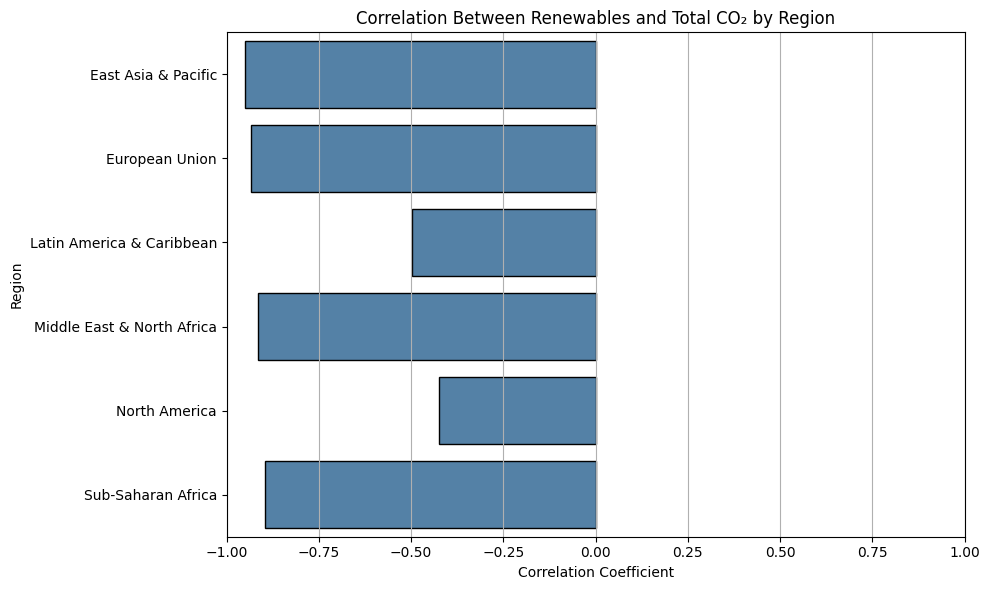

In [22]:
# Bar plot of correlations by region
plt.figure(figsize=(10, 6))
sns.barplot(
    data=region_corrs_total,
    x="Correlation",
    y="Region",
    color="steelblue",
    edgecolor="black"
)

plt.title("Correlation Between Renewables and Total CO₂ by Region")
plt.xlabel("Correlation Coefficient")
plt.xlim(-1, 1)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()